<a href="https://colab.research.google.com/github/MathalinAK/machinelearning/blob/main/housepricepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df =pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: >

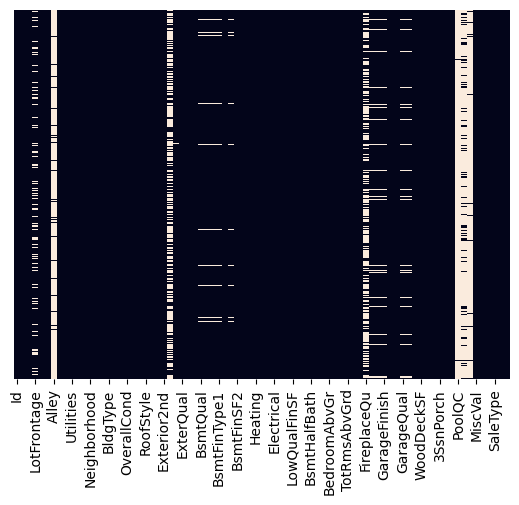

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.shape

(1460, 81)

In [ ]:
#fillinb missing values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df.drop(['Alley'],axis=1,inplace=True)

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<Axes: >

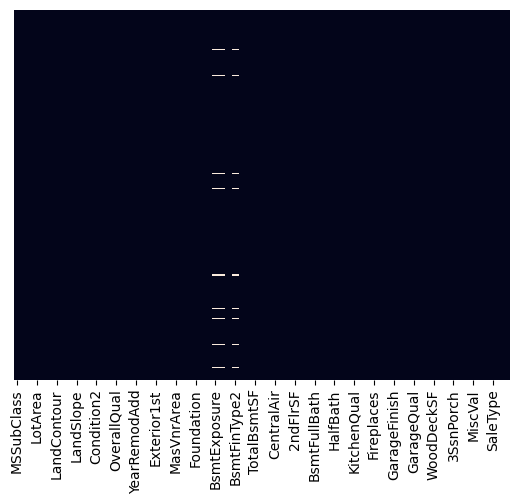

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<Axes: >

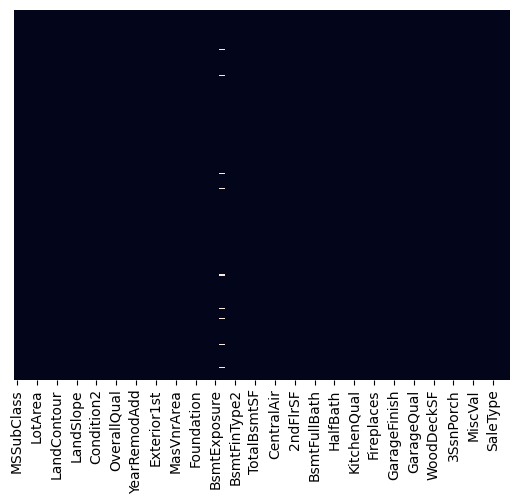

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape


(1422, 75)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
#handle the categorical features

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

39

In [ ]:


def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
## Combine Test Data

test_df=pd.read_csv('formulatedtest.csv')

In [ ]:
test_df.shape

(1459, 74)

In [ ]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
final_df=pd.concat([df,test_df],axis=0)

In [ ]:
final_df['SalePrice']

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


In [ ]:
final_df.shape

(2881, 75)

In [ ]:
final_df=category_onehot_multcols(multcolumns=columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
final_df.shape

(2881, 234)

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(2881, 174)

In [ ]:
  df_Train=final_df.iloc[:1422,:]
  df_Test=final_df.iloc[1422:,:]

In [ ]:
df_Test.shape

(1459, 174)

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-134-8fdc58f80b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [ ]:
import sklearn
print(sklearn.__version__)


1.1.3


In [ ]:
!pip install scikit-learn==1.1.3


In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pickle
filename='finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
 y_pred=classifier.predict(df_Test)

In [ ]:
y_pred

array([132912.3 , 147271.73, 195217.86, ..., 167273.81, 103442.8 ,
       241069.48], dtype=float32)

In [ ]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission1.csv',index=False)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Define the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune the n_estimators parameter

# Fit the model
rf_regressor.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_regressor.predict(df_Test)

# Save the model (optional)
pickle.dump(rf_regressor, open('random_forest_model.pkl', 'wb'))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split X_train into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit and predict
rf_regressor.fit(X_train_split, y_train_split)
rf_val_pred = rf_regressor.predict(X_val_split)

# Evaluate
rf_mse = mean_squared_error(y_val_split, rf_val_pred)
rf_mae = mean_absolute_error(y_val_split, rf_val_pred)
rf_r2 = r2_score(y_val_split, rf_val_pred)

print(f"Random Forest Validation Metrics:\nMSE: {rf_mse}, MAE: {rf_mae}, R²: {rf_r2}")


Random Forest Validation Metrics:
MSE: 954706240.4814504, MAE: 17054.51456140351, R²: 0.8383993454593412


In [ ]:
# Create a DataFrame with predictions
rf_pred_df = pd.DataFrame(rf_y_pred)

# Combine with sample submission IDs
rf_submission = pd.concat([sub_df['Id'], rf_pred_df], axis=1)
rf_submission.columns = ['Id', 'SalePrice']

# Save to CSV
rf_submission.to_csv('random_forest_submission.csv', index=False)


In [ ]:
# ... (previous code) ...

# Assuming you have already fitted the XGBoost model (classifier) and made predictions (y_pred)

# Split data for XGBoost evaluation
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Fit the XGBoost model (if not already fitted)
classifier.fit(X_train_xgb, y_train_xgb)

# Predict on the validation set
y_pred_xgb = classifier.predict(X_val_xgb)

# Calculate evaluation metrics for XGBoost
mse_xgboost = mean_squared_error(y_val_xgb, y_pred_xgb)
mae_xgboost = mean_absolute_error(y_val_xgb, y_pred_xgb)
r2_xgboost = r2_score(y_val_xgb, y_pred_xgb)

print("Model Comparison:")
print(f"XGBoost MSE: {mse_xgboost}, MAE: {mae_xgboost}, R²: {r2_xgboost}")
print(f"Random Forest MSE: {rf_mse}, MAE: {rf_mae}, R²: {rf_r2}")

Model Comparison:
XGBoost MSE: 650941084.7624948, MAE: 16910.34692982456, R²: 0.8898168872217931
Random Forest MSE: 954706240.4814504, MAE: 17054.51456140351, R²: 0.8383993454593412


In [ ]:
print("Model Comparison:")
print(f"XGBoost MSE: {mse_xgboost}, MAE: {mae_xgboost}, R²: {r2_xgboost}")
print(f"Random Forest MSE: {rf_mse}, MAE: {rf_mae}, R²: {rf_r2}")


Model Comparison:
XGBoost MSE: 650941084.7624948, MAE: 16910.34692982456, R²: 0.8898168872217931
Random Forest MSE: 954706240.4814504, MAE: 17054.51456140351, R²: 0.8383993454593412


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
